<a href="https://colab.research.google.com/github/IrunguShawn/colaboratory/blob/main/cust_data%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#https://raw.githubusercontent.com/WinVector/PDSwR2/main/UCICar/car.data.csv
#https://raw.githubusercontent.com/charlesmutai/kdjha/main/custdata.csv
#https://raw.githubusercontent.com/charlesmutai/statlog/main/creditdata.csv
#https://raw.githubusercontent.com/WinVector/PDSwR2/main/Statlog/mapping.R
# https://raw.githubusercontent.com/WinVector/PDSwR2/main/Statlog/german.data


In [2]:
customer_data<-read.csv("https://raw.githubusercontent.com/charlesmutai/kdjha/main/custdata.csv")
str(customer_data)

'data.frame':	73262 obs. of  13 variables:
 $ X             : int  7 8 9 10 11 15 17 19 20 21 ...
 $ custid        : chr  "000006646_03" "000007827_01" "000008359_04" "000008529_01" ...
 $ sex           : chr  "Male" "Female" "Female" "Female" ...
 $ is_employed   : logi  TRUE NA TRUE NA TRUE NA ...
 $ income        : num  22000 23200 21000 37770 39000 ...
 $ marital_status: chr  "Never married" "Divorced/Separated" "Never married" "Widowed" ...
 $ health_ins    : logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ housing_type  : chr  "Homeowner free and clear" "Rented" "Homeowner with mortgage/loan" "Homeowner free and clear" ...
 $ recent_move   : logi  FALSE TRUE FALSE FALSE FALSE FALSE ...
 $ num_vehicles  : int  0 0 2 1 2 2 2 2 5 3 ...
 $ age           : int  24 82 31 93 67 76 26 73 27 54 ...
 $ state_of_res  : chr  "Alabama" "Alabama" "Alabama" "Alabama" ...
 $ gas_usage     : int  210 3 40 120 3 200 3 50 3 20 ...


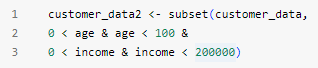

In [3]:
customer_data2<-subset(customer_data,
0< age & age <100 &
0 <income & income<200000)

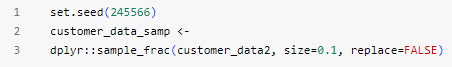

In [4]:
set.seed(245566)
customer_data_samp<-dplyr::sample_frac(customer_data2,size=0.1,replace=FALSE)


A scatter plot with a smoothing curve also makes a useful visualization of the relationship between a continuous variable and a Boolean. Suppose you’re considering using age as an input to your health insurance model. You might want to plot health
insurance coverage as a function of age, as shown in figure 3.14.


The variable health_ins has the value 1 (for TRUE) when the person has health
insurance, and 0 (for FALSE) otherwise. A scatterplot of the data will have all the y-values
at 0 or 1, which may not seem informative, but a smoothing curve of the data estimates
the average value of the 0/1 variable health_ins as a function of age. The average value
of health_ins for a given age is simply the probability that a person of that age in your
dataset has health insurance.

Figure 3.14 shows you that the probability of having health insurance increases as
customer age increases, from about 80% at age 20 to nearly 100% after about age 75

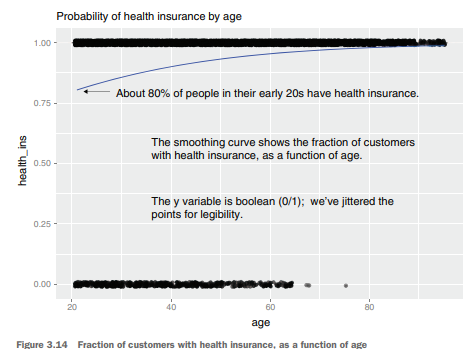

In [5]:
install.packages("ggplot2")
install.packages("hexbin")
install.packages("WVPlots")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘wrapr’, ‘sigr’, ‘cdata’, ‘rqdatatable’, ‘rquery’, ‘gridExtra’




In [6]:
library(hexbin)
library(ggplot2)
library(WVPlots)

Loading required package: wrapr



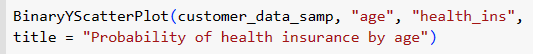

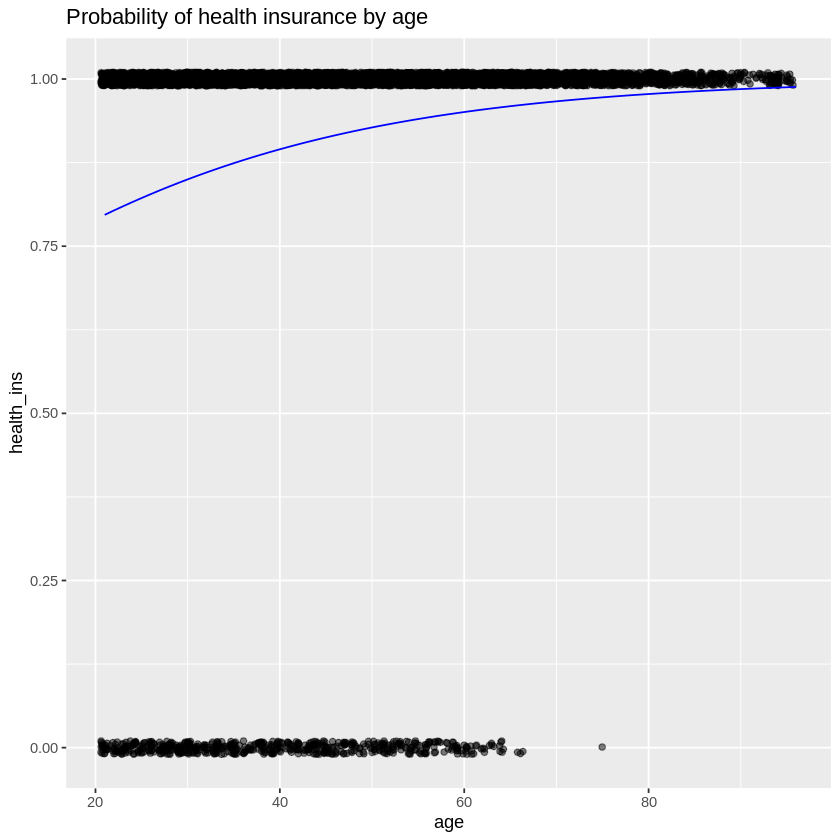

In [7]:
BinaryYScatterPlot(customer_data_samp, "age", "health_ins", title = "Probability of health insurance by age")

By default, BinaryYScatterPlot fits a logistic regression curve through the data. You
will learn more about logistic regression later, but for now just know that a
logistic regression tries to estimate the probability that the Boolean outcome y is true,
as a function of the data x.
If you tried to plot all the points from the customer_data2 dataset, the scatter plot
would turn into an illegible smear. To plot all the data in higher volume situations like
this, try an aggregated plot, like a hexbin plot

# HEXBIN PLOTS
A hexbin plot is like a two-dimensional histogram. The data is divided into bins, and the
number of data points in each bin is represented by color or shading. Let’s go back to
the income versus age example. Figure 3.15 shows a hexbin plot of the data. Note how
the smoothing curve traces out the shape formed by the densest region of data.

To make a hexbin plot in R, you must have the hexbin package installed.  Once hexbin is installed and the library
loaded, you create the plots using the geom_hex layer, or use the convenience function HexBinPlot from WVPlots, as we do here. HexBinPlot predefines a color scale
where denser cells are colored darker; the default ggplot2 color scale colors denser
cells lighter.

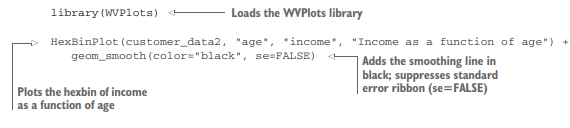

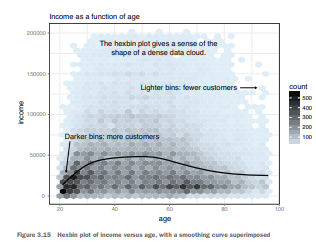

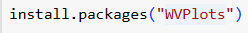

In [8]:
install.packages("WVPlots")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



image.png

In [9]:
install.packages("ggplot2")
install.packages("hexbin")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



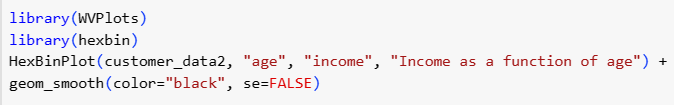

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


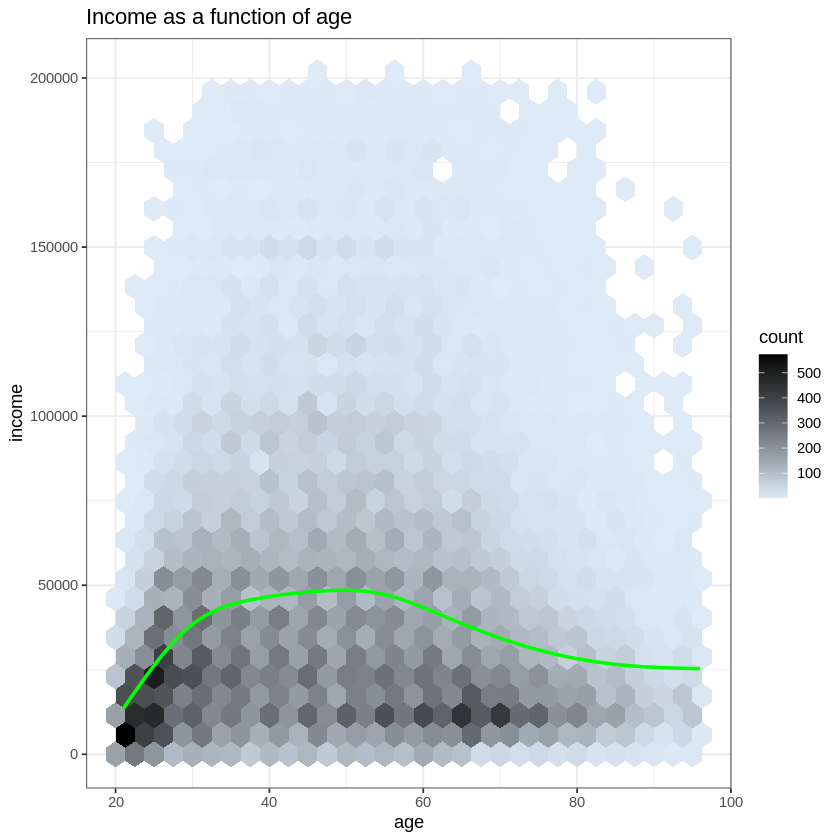

In [10]:
library(WVPlots)
library(hexbin)
library(ggplot2)
HexBinPlot(customer_data2,"age","income", "Income as a function of age") + geom_smooth(color = "green", se = FALSE)

# **Ways to visualize the relationship between two categorical variables.**

# **BAR CHARTS FOR TWO CATEGORICAL VARIABLES**
Let’s examine the relationship between marital status and the probability of health
insurance coverage. The most straightforward way to visualize this is with a stacked bar
chart, as shown in figure 3.16.
The stacked bar chart makes it easy to compare the total number of people in each
marital category, and to compare the number of uninsured people in each marital category. However, you can’t directly compare the number of insured people in each
category, because the bars don’t all start at the same level. So some people prefer the
side-by-side bar chart, shown in figure 3.17, which makes it easier to compare the number of both insured and uninsured across categories—but not the total number of
people in each category

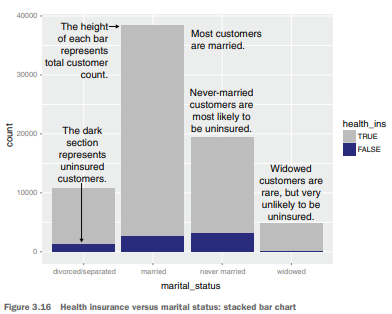

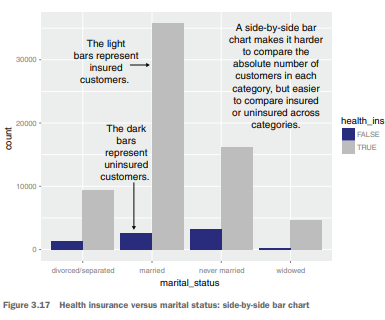

If you want to compare the number of insured and uninsured people across categories, while keeping a sense of the total number of people in each category, one plot to
try is what we call a shadow plot. A shadow plot of this data creates two graphs, one for
the insured population and one for the uninsured population. Both graphs are superimposed against a “shadow graph” of the total population. This allows comparison
both across and within marital status categories, while maintaining information about
category totals. This is shown in figure 3.18.

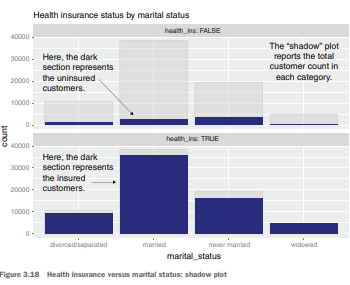

The main shortcoming of all the preceding charts is that you can’t easily compare the
ratios of insured to uninsured across categories, especially for rare categories like Widowed. You can use what ggplot2 calls a filled bar chart to plot a visualization of the
ratios directly, as in figure 3.19.
The filled bar chart makes it obvious that divorced customers are slightly more
likely to be uninsured than married ones. But you’ve lost the information that being
widowed, though highly predictive of insurance coverage, is a rare category.
Which bar chart you use depends on what information is most important for you to
convey. The code to generate each of these plots is given next. Note the use of the
fill aesthetic in the ggplot2 commands; this tells ggplot2 to color (fill) the bars according to the value of the variable health_ins. The position argument to
geom_bar specifies the bar chart style.

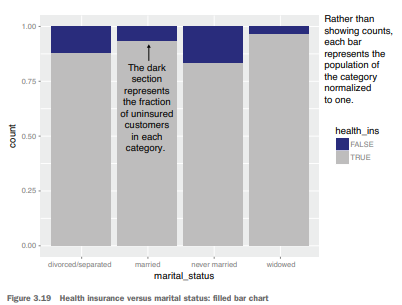

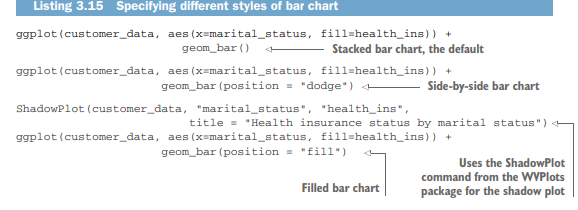

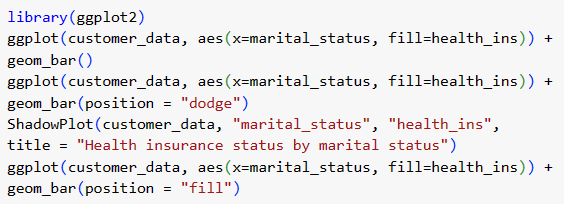

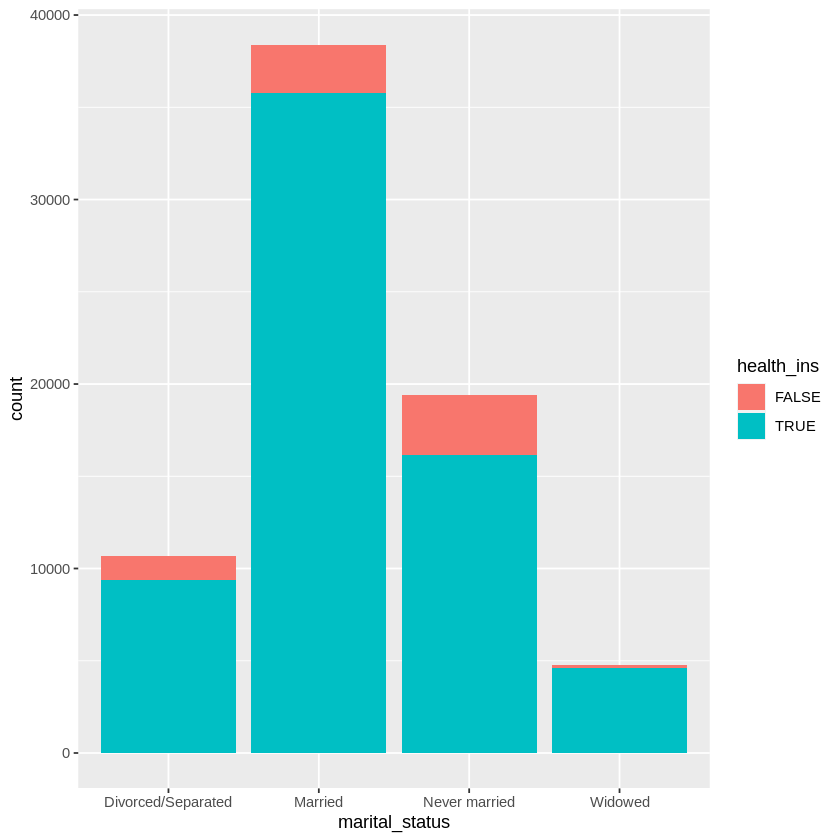

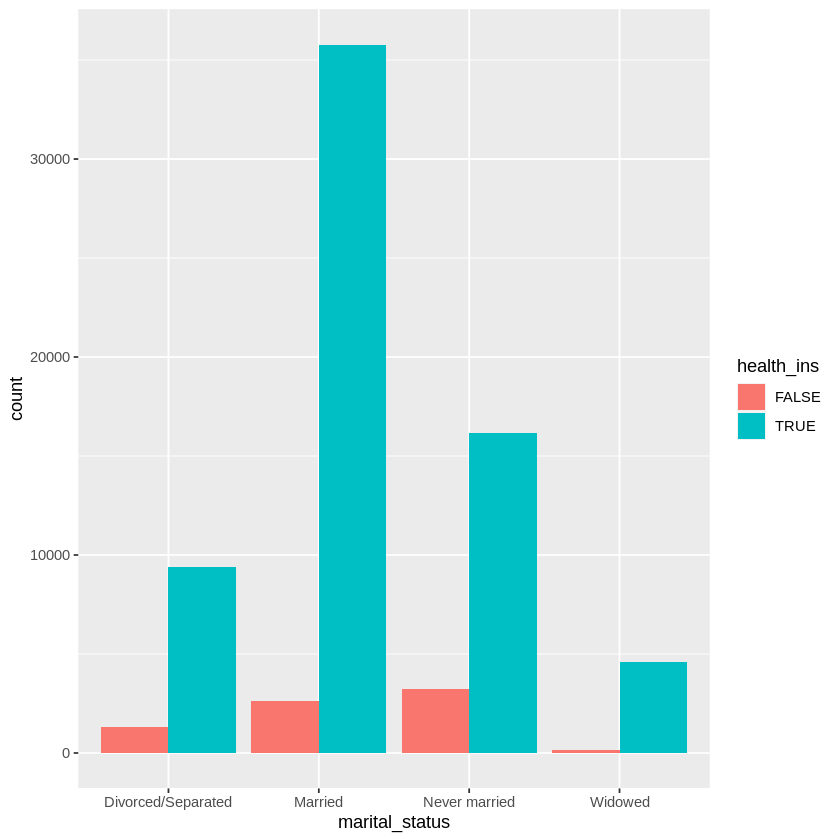

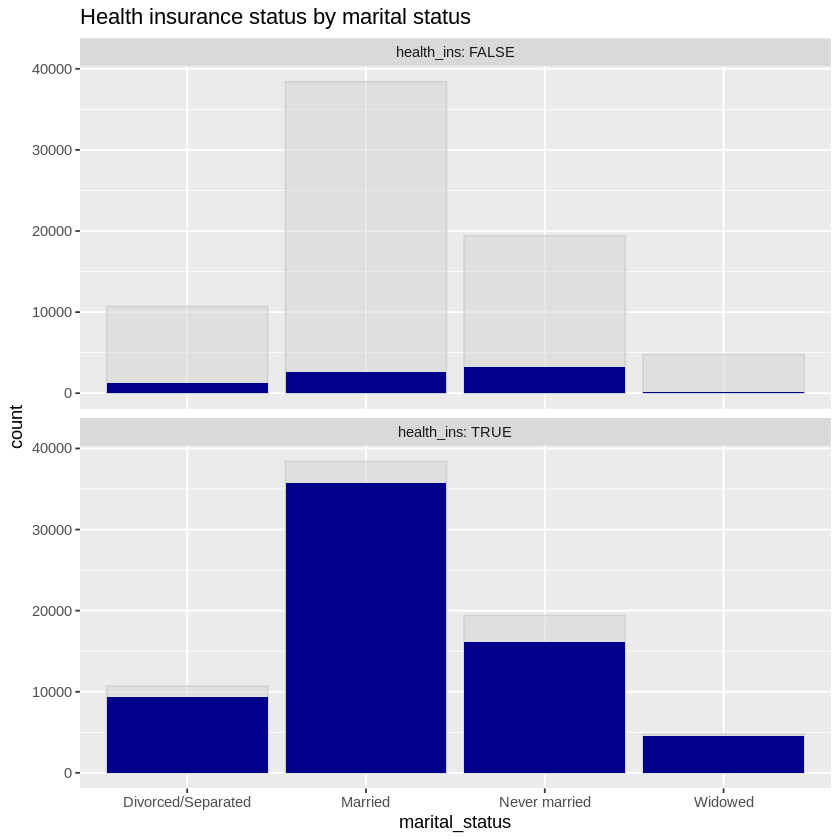

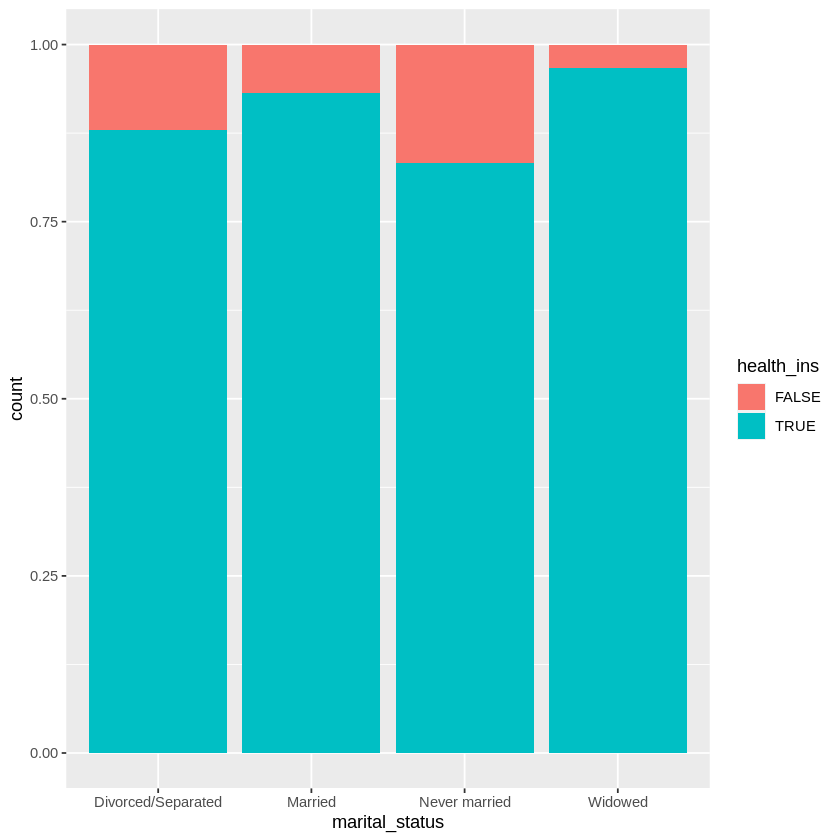

In [11]:
library(ggplot2)
ggplot(customer_data, aes(x=marital_status, fill=health_ins)) + geom_bar() 
ggplot(customer_data,  aes(x=marital_status, fill=health_ins)) + geom_bar(position = "dodge")
ShadowPlot(customer_data, "marital_status", "health_ins", title="Health insurance status by marital status")
ggplot(customer_data,  aes(x=marital_status, fill=health_ins)) + geom_bar(position = "fill")

In the preceding examples, one of the variables was binary; the same plots can be
applied to two variables that each have several categories, but the results are harder to
read. Suppose you’re interested in the distribution of marriage status across housing
types. Some find the side-by-side bar chart easiest to read in this situation, but it’s not
perfect, as you see in figure 3.20.

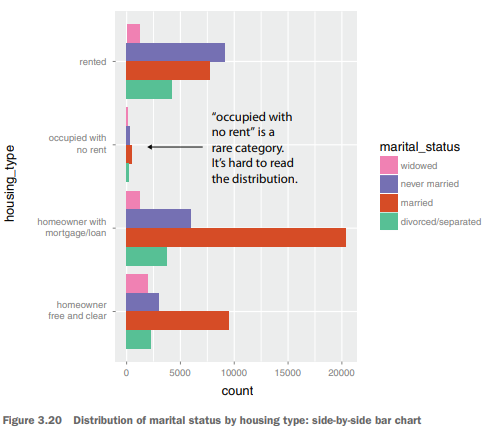

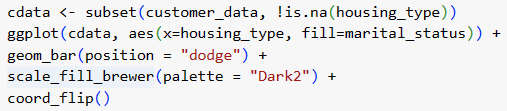

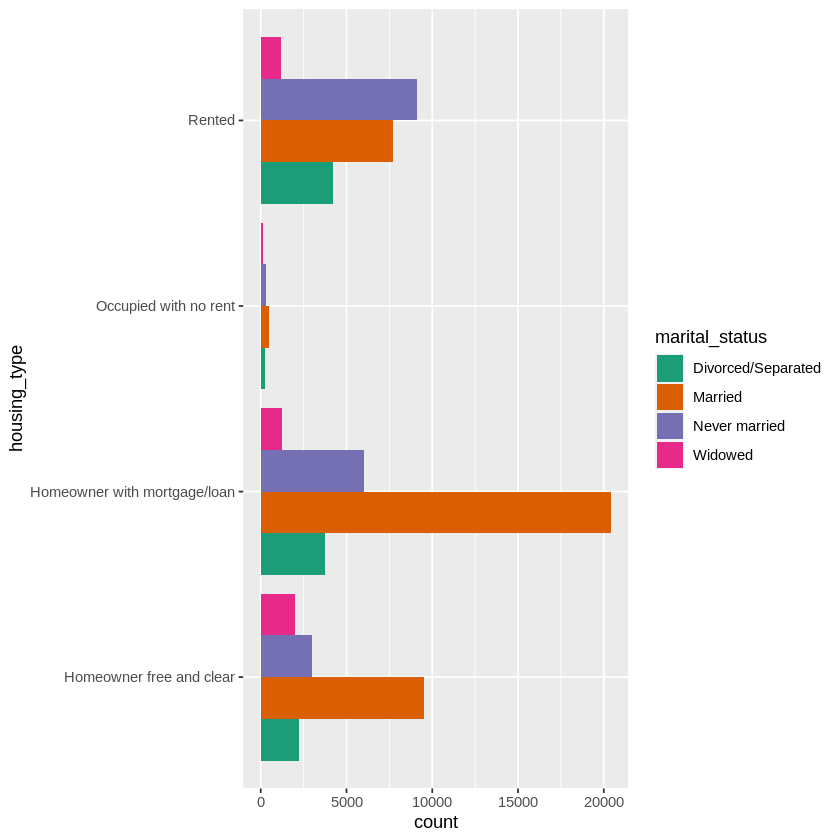

In [12]:
cdata = subset(customer_data, !is.na(housing_type))
ggplot(cdata, aes(x=housing_type, fill=marital_status)) + geom_bar(position = "dodge") + scale_fill_brewer(palette="Dark2") + coord_flip()

A graph like figure 3.20 gets cluttered if either of the variables has a large number of
categories. A better alternative is to break the distributions into different graphs, one
for each housing type. In ggplot2 this is called faceting the graph, and you use the
facet_wrap layer. The result is shown in figure 3.21.
The code for figures 3.20 and 3.21 looks like the next listing.

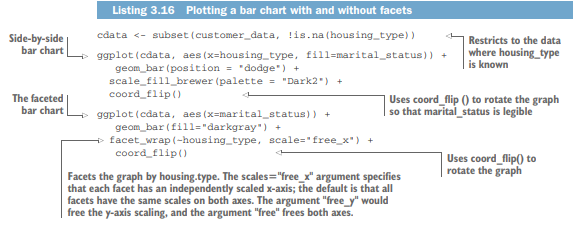

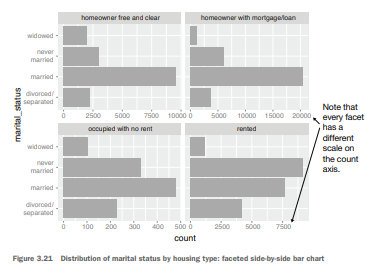

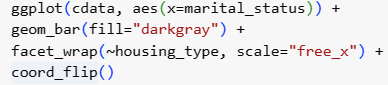

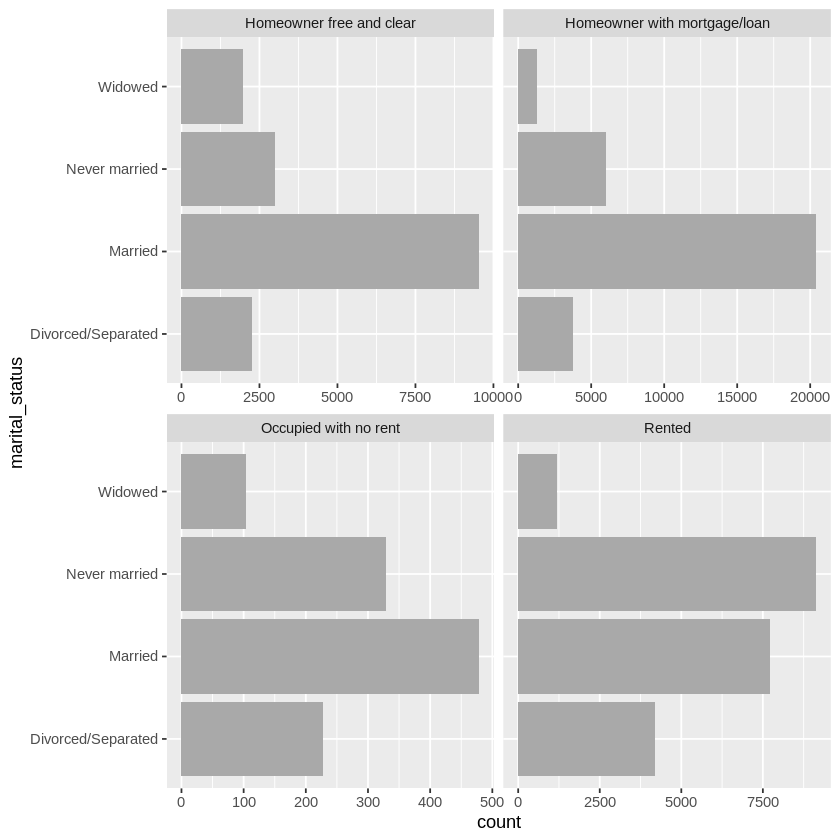

In [13]:
ggplot(cdata, aes(x=marital_status)) + geom_bar(fill="darkgray") + facet_wrap(~housing_type, scale="free_x") + coord_flip()

# **COMPARING A CONTINUOUS AND CATEGORICAL VARIABLE**
Suppose you want to compare the age distributions of people of different marital statuses in your data. You saw in section 3.2.1 that you can use histograms or density plots
to look at the distribution of continuous variables like age. Now you want multiple distribution plots: one for each category of marital status. The most straightforward way
to do this is to superimpose these plots in the same graph.
Figure 3.22 compares the age distributions of the widowed (dashed line) and never
married (solid line) populations in the data. You can quickly see that the two populations are distributed quite differently: the widowed population skews older, and the
never married population skews younger.

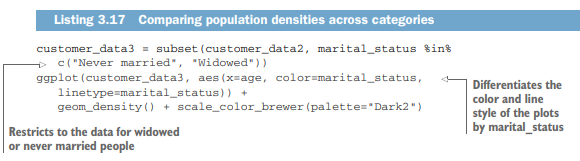

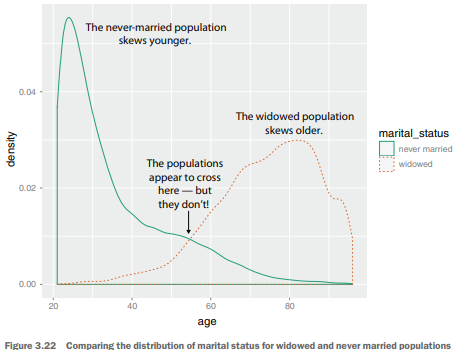

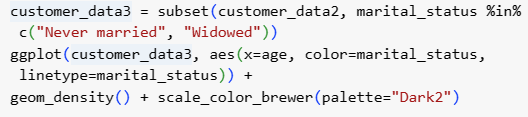

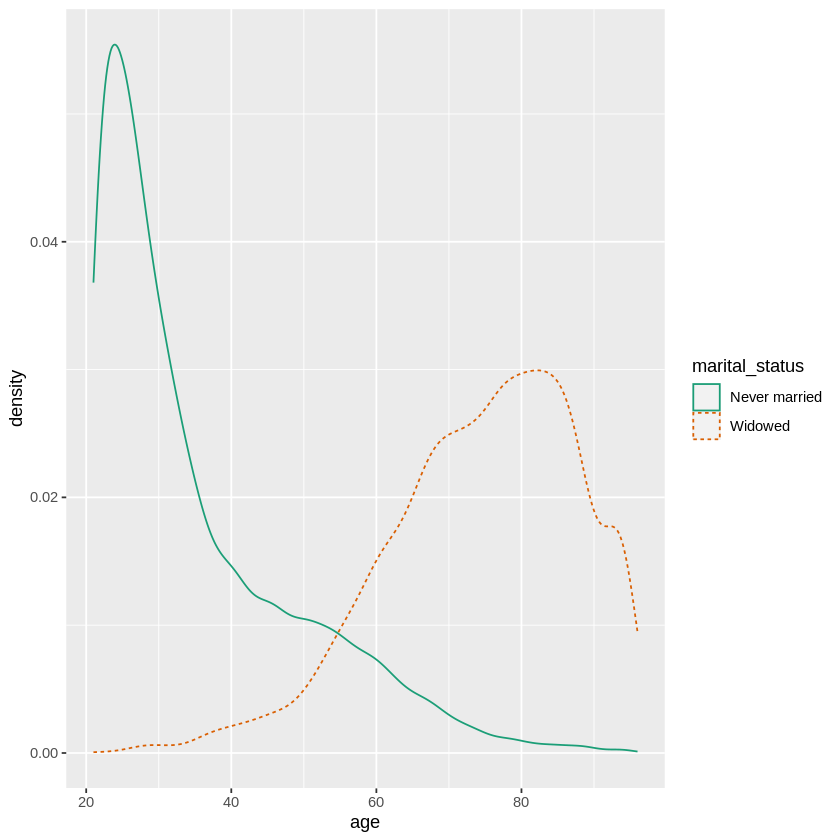

In [14]:
customer_data3 = subset(customer_data2, marital_status %in% c("Never married", "Widowed"))
ggplot(customer_data3, aes(x=age, color=marital_status, linetype=marital_status)) + geom_density() +scale_color_brewer(palette="Dark2")

Overlaid density plots give you good information about distribution shape: where
populations are dense and where they are sparse, whether the populations are separated or overlap. However, they lose information about the relative size of each population. This is because each individual density plot is scaled to have unit area. This has
the advantage of improving the legibility of each individual distribution, but can fool
you into thinking that all the populations are about the same size. In fact, the superimposed density plots in figure 3.22 can also fool you into thinking that the widowed
population becomes greater than the never married population after age 55, which is
actually not true.
To retain information about the relative size of each population, use histograms.
Histograms don't superimpose well, so you can use the facet_wrap() command with
geom_histogram(), as you saw with bar charts in listing 3.16. You can also produce a
histogram version of the shadow plot, using the ShadowHist() function from WVPlots,
as shown next.

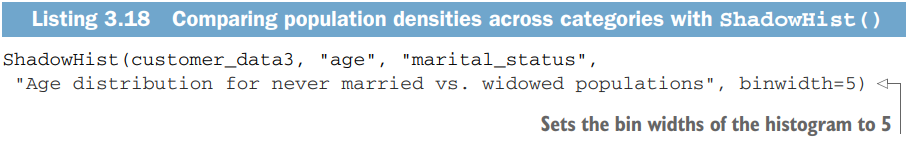

The result is shown in figure 3.23. Now you can see that the widowed population is
quite small, and doesn’t exceed the never married population until after about age
65—10 years later than the crossover point in figure 3.22.

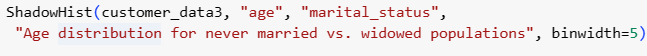

Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.
ℹ The deprecated feature was likely used in the WVPlots package.
  Please report the issue at <https://github.com/WinVector/WVPlots/issues>.”


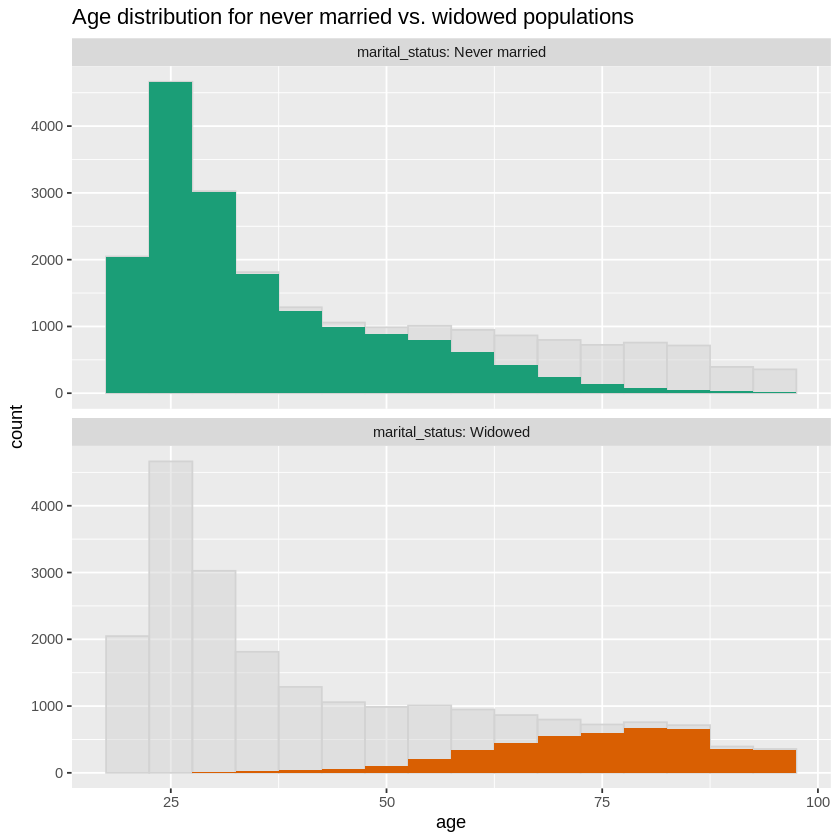

In [15]:
ShadowHist(customer_data3, "age", "marital_status", "Age distribution for never married vs. widowed populations", binwidth = 5)

You should also use faceting when comparing distributions across more than two categories, because too many overlaid plots are hard to read. Try examining the age distributions for all four categories of marital status; the plot is shown in figure 3.24.

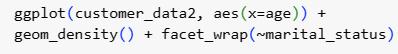

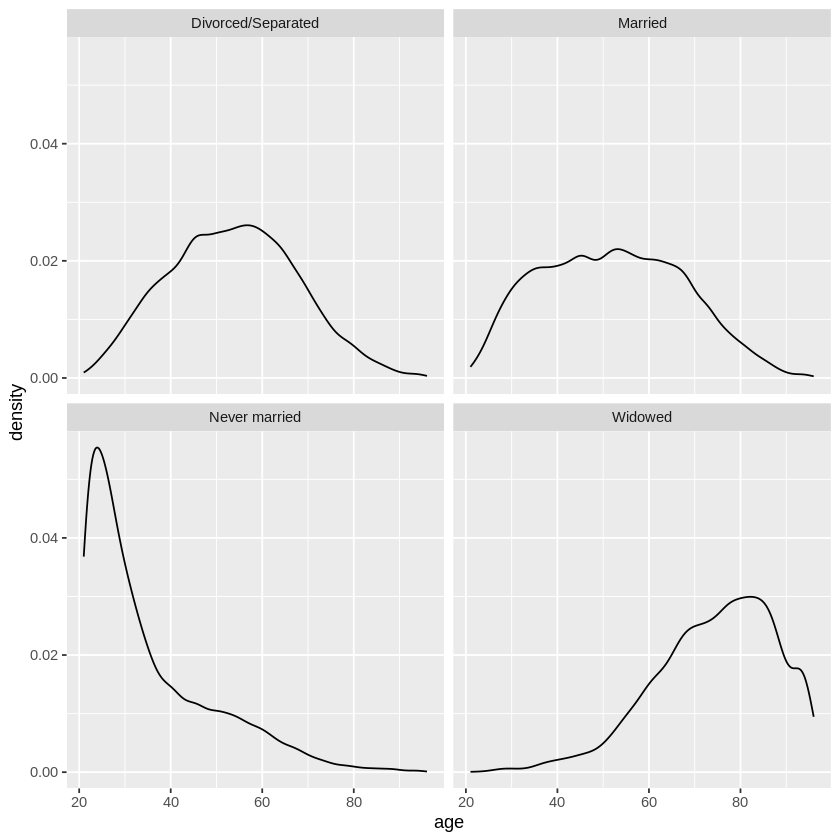

In [16]:
ggplot(customer_data2, aes(x=age)) + geom_density() + facet_wrap(~marital_status)

Again, these density plots give you good information about distribution shape, but
they lose information about the relative size of each population.